In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from isaac.visualization import plot_lineplot_with_paper_style, smooth_out_rl_stats

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
model_directory = "models/answer_questions/"
data_directory = "answer_questions_plots/"

In [3]:
stats = pd.read_hdf(data_directory+"training_data.h5", "training_data")

In [4]:
stats["Episode"] = stats.index

In [5]:
stats.head()

,control,correct_answer,episode_length,question_loss,value_loss,seed,Episode
0,2,True,613,0,"tensor(0.0444, device='cuda:0')",0,0
1,1,False,603,0,"tensor(0.0475, device='cuda:0')",0,1
0,1,True,605,0,"tensor(0.1056, device='cuda:0')",42,0
1,1,True,605,0,"tensor(0.1033, device='cuda:0')",42,1
0,0,False,605,0,"tensor(0.0612, device='cuda:0')",72,0


In [6]:
np.corrcoef(stats.control, stats.correct_answer)

array([[1.        , 0.72760688],
       [0.72760688, 1.        ]])

In [7]:
stats["none"] = (stats.control == 0)
stats["one_ball"] = (stats.control == 1)
stats["two_balls"] = (stats.control == 2)

In [8]:
WINDOW_SIZE = 100

In [9]:
columns = ["none", "one_ball", "two_balls", "episode_length", "value_loss", "correct_answer"]
rolling_stats = smooth_out_rl_stats(stats, columns)

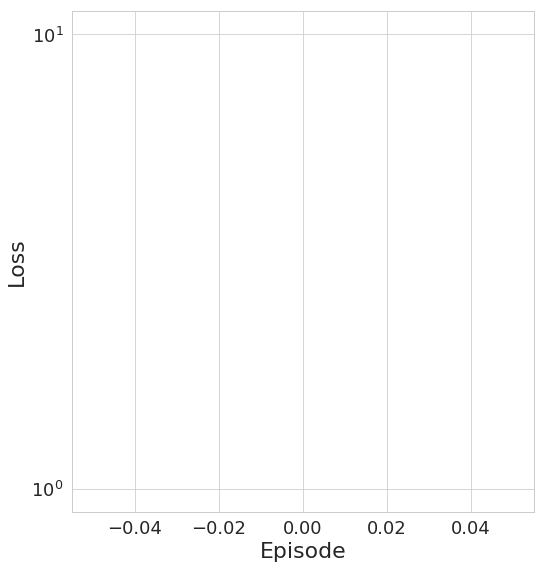

In [10]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="value_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd")
ax.set_yscale("log")
plt.ylabel("Loss")
plt.savefig(data_directory+"loss.pdf")

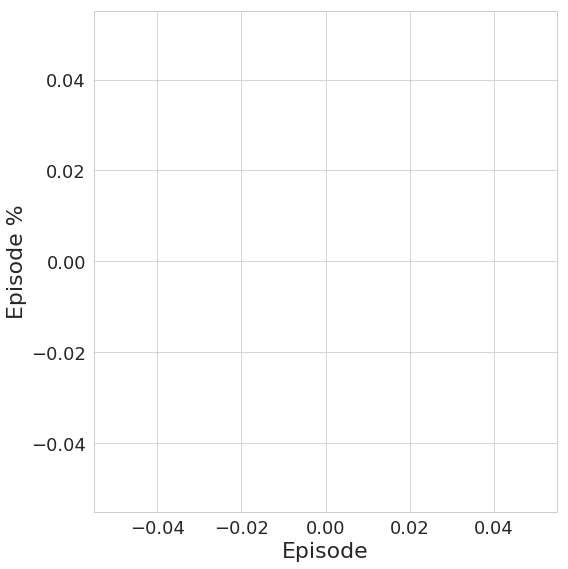

In [11]:
rolling_stats["Episode"] = rolling_stats.index
ax = plot_lineplot_with_paper_style(None, x="Episode", y="none", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="none")
ax = plot_lineplot_with_paper_style(None, ax=ax, x="Episode", y="one_ball", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="one ball")
ax = plot_lineplot_with_paper_style(None, ax=ax, x="Episode", y="two_balls", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="two balls")

plt.ylabel("Episode %")
plt.savefig(data_directory+"control.pdf")

In [12]:
stats.one_ball.mean(), stats.two_balls.mean()

(0.5, 0.16666666666666666)

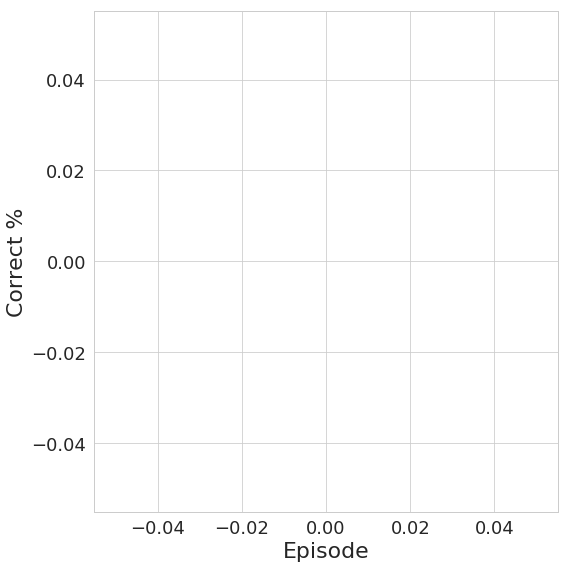

In [13]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="correct_answer", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Correct %")
plt.savefig(data_directory+"correct.pdf")

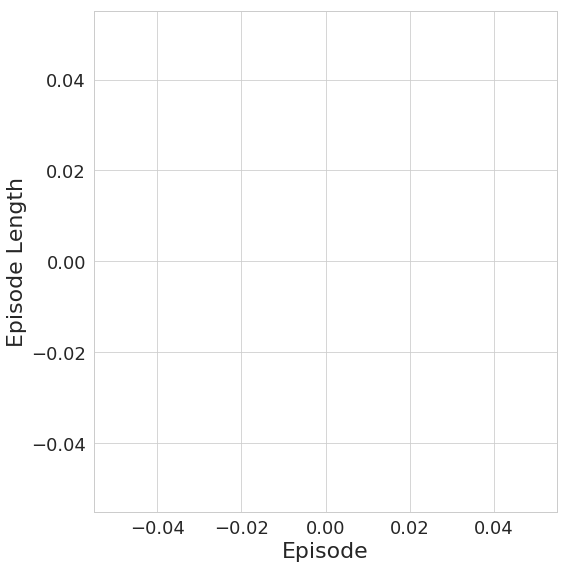

In [14]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="episode_length", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Episode Length")
plt.savefig(data_directory+"episode_length.pdf")

# Validation data

In [15]:
stats = pd.read_hdf(data_directory+"validation_data.h5", "validation_data")

In [16]:
stats.episode = stats.episode.astype(int)
stats.seed = stats.seed.astype(int)

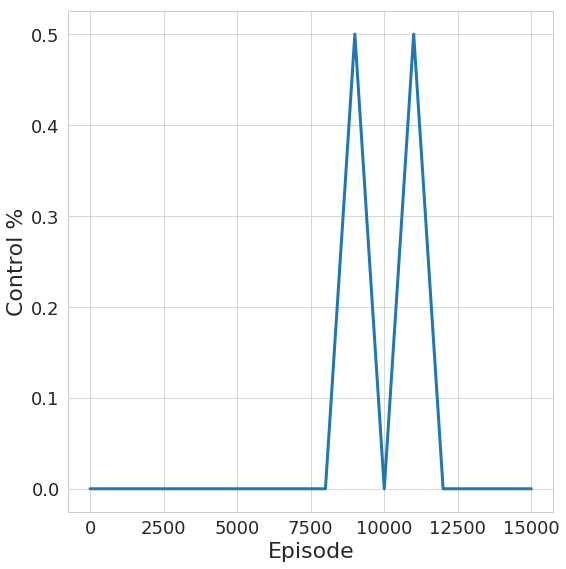

In [17]:
plt.xticks(ticks=np.arange(0, stats.episode.max(), 5000), labels=np.arange(0, stats.episode.max(), 5000))
ax = plot_lineplot_with_paper_style(None, x="episode", y="avg_control", data=stats, linewidth=3)
plt.ylabel("Control %")
plt.xlabel("Episode")
plt.savefig(data_directory+"validation_control.pdf")

In [18]:
stats.sort_values(by="avg_control", ascending=False).iloc[0]

avg_answers              0.5
avg_control              0.5
avg_episode_length     312.0
std_answers              0.5
std_control              0.5
std_episode_length      11.0
seed                     0.0
episode               9000.0
Name: 0, dtype: float64

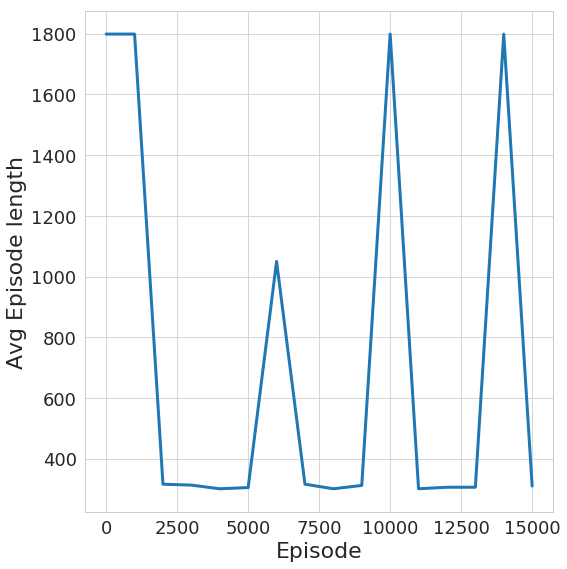

In [19]:
plt.xticks(ticks=np.arange(0, stats.episode.max(), 5000), labels=np.arange(0, stats.episode.max(), 5000))
ax = plot_lineplot_with_paper_style(None, x="episode", y="avg_episode_length", data=stats, linewidth=3)
plt.ylabel("Avg Episode length")
plt.xlabel("Episode")
plt.savefig(data_directory+"validation_ep_length.pdf")